# Random Forest - Pipeline Condition Classification
## TASK 5: Baseline Model Evaluation

**Date:** December 30, 2025  
**Algorithm:** Random Forest Classifier  
**Target:** Condition (Normal / Moderate / Critical)  
**Problem Type:** Multi-class Classification

---
## Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries loaded')

✓ Libraries loaded


---
## Load Data

In [2]:
# Load train/test splits
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

print('✓ Data loaded')
print(f'Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features')
print(f'Test set: {X_test.shape[0]} samples')

✓ Data loaded
Training set: 800 samples, 24 features
Test set: 200 samples


---
## Train Model

In [3]:
# Initialize and train Random Forest
model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=None,          # Trees grow until pure
    min_samples_split=2,     # Minimum samples to split
    min_samples_leaf=1,      # Minimum samples in leaf
    random_state=42,         # Reproducibility
    n_jobs=-1                # Use all CPU cores
)

print('Training Random Forest...')
model.fit(X_train, y_train)
print('✓ Model trained successfully')
print(f'Number of trees: {model.n_estimators}')

Training Random Forest...
✓ Model trained successfully
Number of trees: 100


---
## Make Predictions

In [4]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Prediction probabilities
y_test_proba = model.predict_proba(X_test)

print('✓ Predictions completed')

✓ Predictions completed


---
## Evaluate Performance

In [5]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('='*60)
print('RANDOM FOREST - PERFORMANCE METRICS')
print('='*60)
print(f'\nTraining Accuracy:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
print(f'Test Accuracy:       {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'\nOverfitting Check:   {train_accuracy - test_accuracy:.4f}')
if train_accuracy - test_accuracy < 0.05:
    print('Status: ✓ Good generalization')
elif train_accuracy - test_accuracy < 0.10:
    print('Status: ⚠ Slight overfitting')
else:
    print('Status: ⚠ Overfitting detected')

RANDOM FOREST - PERFORMANCE METRICS

Training Accuracy:   1.0000 (100.00%)
Test Accuracy:       0.9950 (99.50%)

Overfitting Check:   0.0050
Status: ✓ Good generalization


In [6]:
# Classification Report
print('\n' + '='*60)
print('CLASSIFICATION REPORT - TEST SET')
print('='*60)

# Load target mapping for class names
import json
try:
    with open('target_mapping.json', 'r') as f:
        target_mapping = json.load(f)
    class_names = [k for k, v in sorted(target_mapping.items(), key=lambda x: x[1])]
except:
    class_names = ['Class_0', 'Class_1', 'Class_2']

print(classification_report(y_test, y_test_pred, target_names=class_names))


CLASSIFICATION REPORT - TEST SET
              precision    recall  f1-score   support

     Class_0       1.00      1.00      1.00        97
     Class_1       0.98      1.00      0.99        60
     Class_2       1.00      0.98      0.99        43

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



---
## Confusion Matrix

✓ Saved: confusion_matrix_random_forest.png


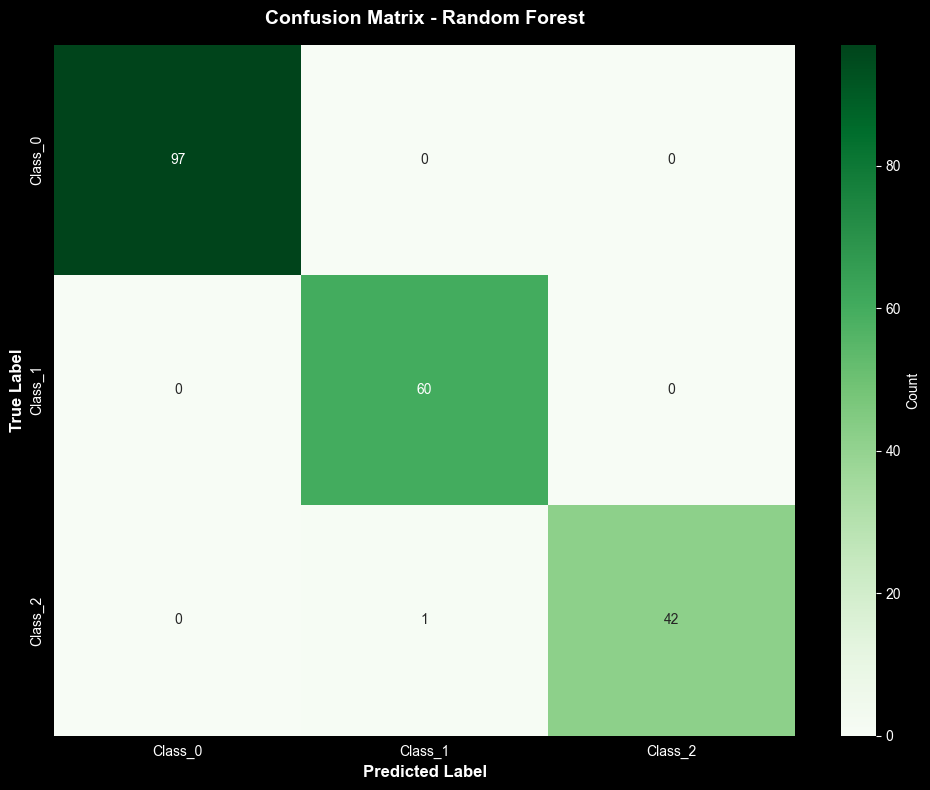

In [7]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_random_forest.png', dpi=300, bbox_inches='tight')
print('✓ Saved: confusion_matrix_random_forest.png')
plt.show()

---
## Feature Importance

In [8]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print('Feature Importance (Top 15):')
print('='*60)
print(feature_importance.head(15).to_string(index=False))

# Save full feature importance
feature_importance.to_csv('feature_importance_random_forest.csv', index=False)
print('\n✓ Saved: feature_importance_random_forest.csv')

Feature Importance (Top 15):
                    Feature  Importance
          Thickness_Loss_mm    0.428581
        Thickness_Loss_Rate    0.132818
       Thickness_Loss_Ratio    0.097830
      Material_Loss_Percent    0.097498
         Material_Loss_Rate    0.046215
               Thickness_mm    0.034981
        Remaining_Thickness    0.033200
               Pipe_Size_mm    0.022435
    Critical_Threshold_Flag    0.019937
                 Time_Years    0.014567
Pressure_to_Thickness_Ratio    0.011982
         Pipe_Size_Category    0.008937
               Age_Category    0.008706
 Corrosion_Time_Interaction    0.007350
              Temperature_C    0.006912

✓ Saved: feature_importance_random_forest.csv


✓ Saved: feature_importance_plot_random_forest.png


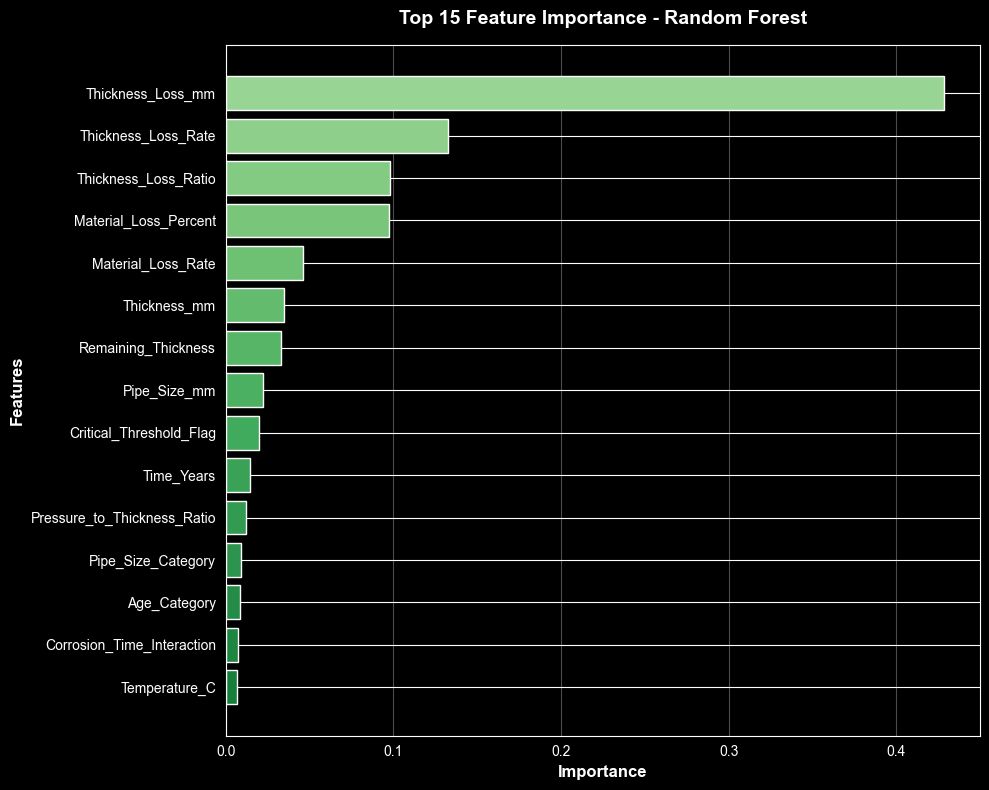

In [9]:
# Visualize top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(top_features)))
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importance - Random Forest', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance_plot_random_forest.png', dpi=300, bbox_inches='tight')
print('✓ Saved: feature_importance_plot_random_forest.png')
plt.show()

---
## Model Information

In [10]:
# Display model parameters
print('Random Forest Configuration:')
print('='*60)
print(f'Number of trees (n_estimators): {model.n_estimators}')
print(f'Max depth: {model.max_depth}')
print(f'Min samples split: {model.min_samples_split}')
print(f'Min samples leaf: {model.min_samples_leaf}')
print(f'Random state: {model.random_state}')
print(f'\nTotal features used: {model.n_features_in_}')
print(f'Classes: {model.classes_}')

Random Forest Configuration:
Number of trees (n_estimators): 100
Max depth: None
Min samples split: 2
Min samples leaf: 1
Random state: 42

Total features used: 24
Classes: [0 1 2]


---
## Save Results

In [11]:
# Save results
results = {
    'Model': 'Random Forest',
    'Training_Accuracy': round(train_accuracy, 4),
    'Test_Accuracy': round(test_accuracy, 4),
    'N_Estimators': model.n_estimators,
    'Features': X_train.shape[1],
    'Training_Samples': X_train.shape[0],
    'Test_Samples': X_test.shape[0]
}

results_df = pd.DataFrame([results])
results_df.to_csv('random_forest_results.csv', index=False)
print('✓ Saved: random_forest_results.csv')

# Save predictions
predictions_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_test_pred
})

# Add probability columns
for i, class_name in enumerate(class_names):
    predictions_df[f'Prob_{class_name}'] = y_test_proba[:, i]

predictions_df.to_csv('random_forest_predictions.csv', index=False)
print('✓ Saved: random_forest_predictions.csv')

✓ Saved: random_forest_results.csv
✓ Saved: random_forest_predictions.csv


---
## Summary

### Model: Random Forest Classifier
- **Algorithm:** Ensemble of decision trees
- **Trees:** 100 estimators
- **Scaling:** Not required (tree-based model)

### Performance:
- Check accuracy scores above
- Review classification report for per-class metrics
- Analyze confusion matrix for misclassifications

### Feature Importance:
- Shows which features contribute most to predictions
- Based on average impurity decrease across all trees
- Higher values = more important features

### Files Generated:
- confusion_matrix_random_forest.png
- feature_importance_plot_random_forest.png
- feature_importance_random_forest.csv
- random_forest_results.csv
- random_forest_predictions.csv

### Advantages:
- No feature scaling needed
- Handles non-linear relationships well
- Robust to outliers
- Provides feature importance
- Generally high accuracy

---
**Random Forest Complete!**